In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz

%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

pd.options.display.max_columns= None

In [2]:
df = pd.read_csv("autosmodified.csv")

In [3]:
df

,symboling,normalized-losses,make-id,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
213,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
214,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
215,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          217 non-null    int64  
 1   normalized-losses  176 non-null    float64
 2   make-id            217 non-null    object 
 3   fuel-type          217 non-null    object 
 4   aspiration         217 non-null    object 
 5   num-of-doors       215 non-null    object 
 6   body-style         217 non-null    object 
 7   drive-wheels       217 non-null    object 
 8   engine-location    217 non-null    object 
 9   wheel-base         217 non-null    float64
 10  length             217 non-null    float64
 11  width              217 non-null    float64
 12  height             217 non-null    float64
 13  curb-weight        217 non-null    int64  
 14  engine-type        217 non-null    object 
 15  num-of-cylinders   217 non-null    object 
 16  engine-size        217 non

In [5]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,217.000000,176.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,213.000000,213.000000,217.000000,215.000000,215.000000,217.000000,217.000000,213.000000
mean,0.723502,119.397727,99.181567,174.882028,66.037788,53.862673,2582.456221,127.700461,3.346103,3.250516,10.139263,105.637209,5135.581395,24.976959,30.460829,13395.906103
std,1.300659,36.259711,6.135049,12.478489,2.173696,2.449478,518.500946,40.682461,0.280603,0.309802,3.971464,39.310750,469.938862,6.479628,6.825849,7880.975753
min,-2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,0.000000
25%,0.000000,94.000000,94.500000,167.300000,64.200000,52.000000,2191.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7799.000000
50%,1.000000,109.000000,97.200000,173.500000,65.600000,54.100000,2460.000000,120.000000,3.330000,3.270000,9.000000,97.000000,5200.000000,24.000000,30.000000,10898.000000
75%,2.000000,148.000000,103.300000,186.600000,67.200000,55.700000,3012.000000,141.000000,3.620000,3.400000,9.400000,120.500000,5500.000000,30.000000,34.000000,16630.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make-id               0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
df.duplicated().sum()

11

In [8]:
df.shape

(217, 26)

### Data Exploration

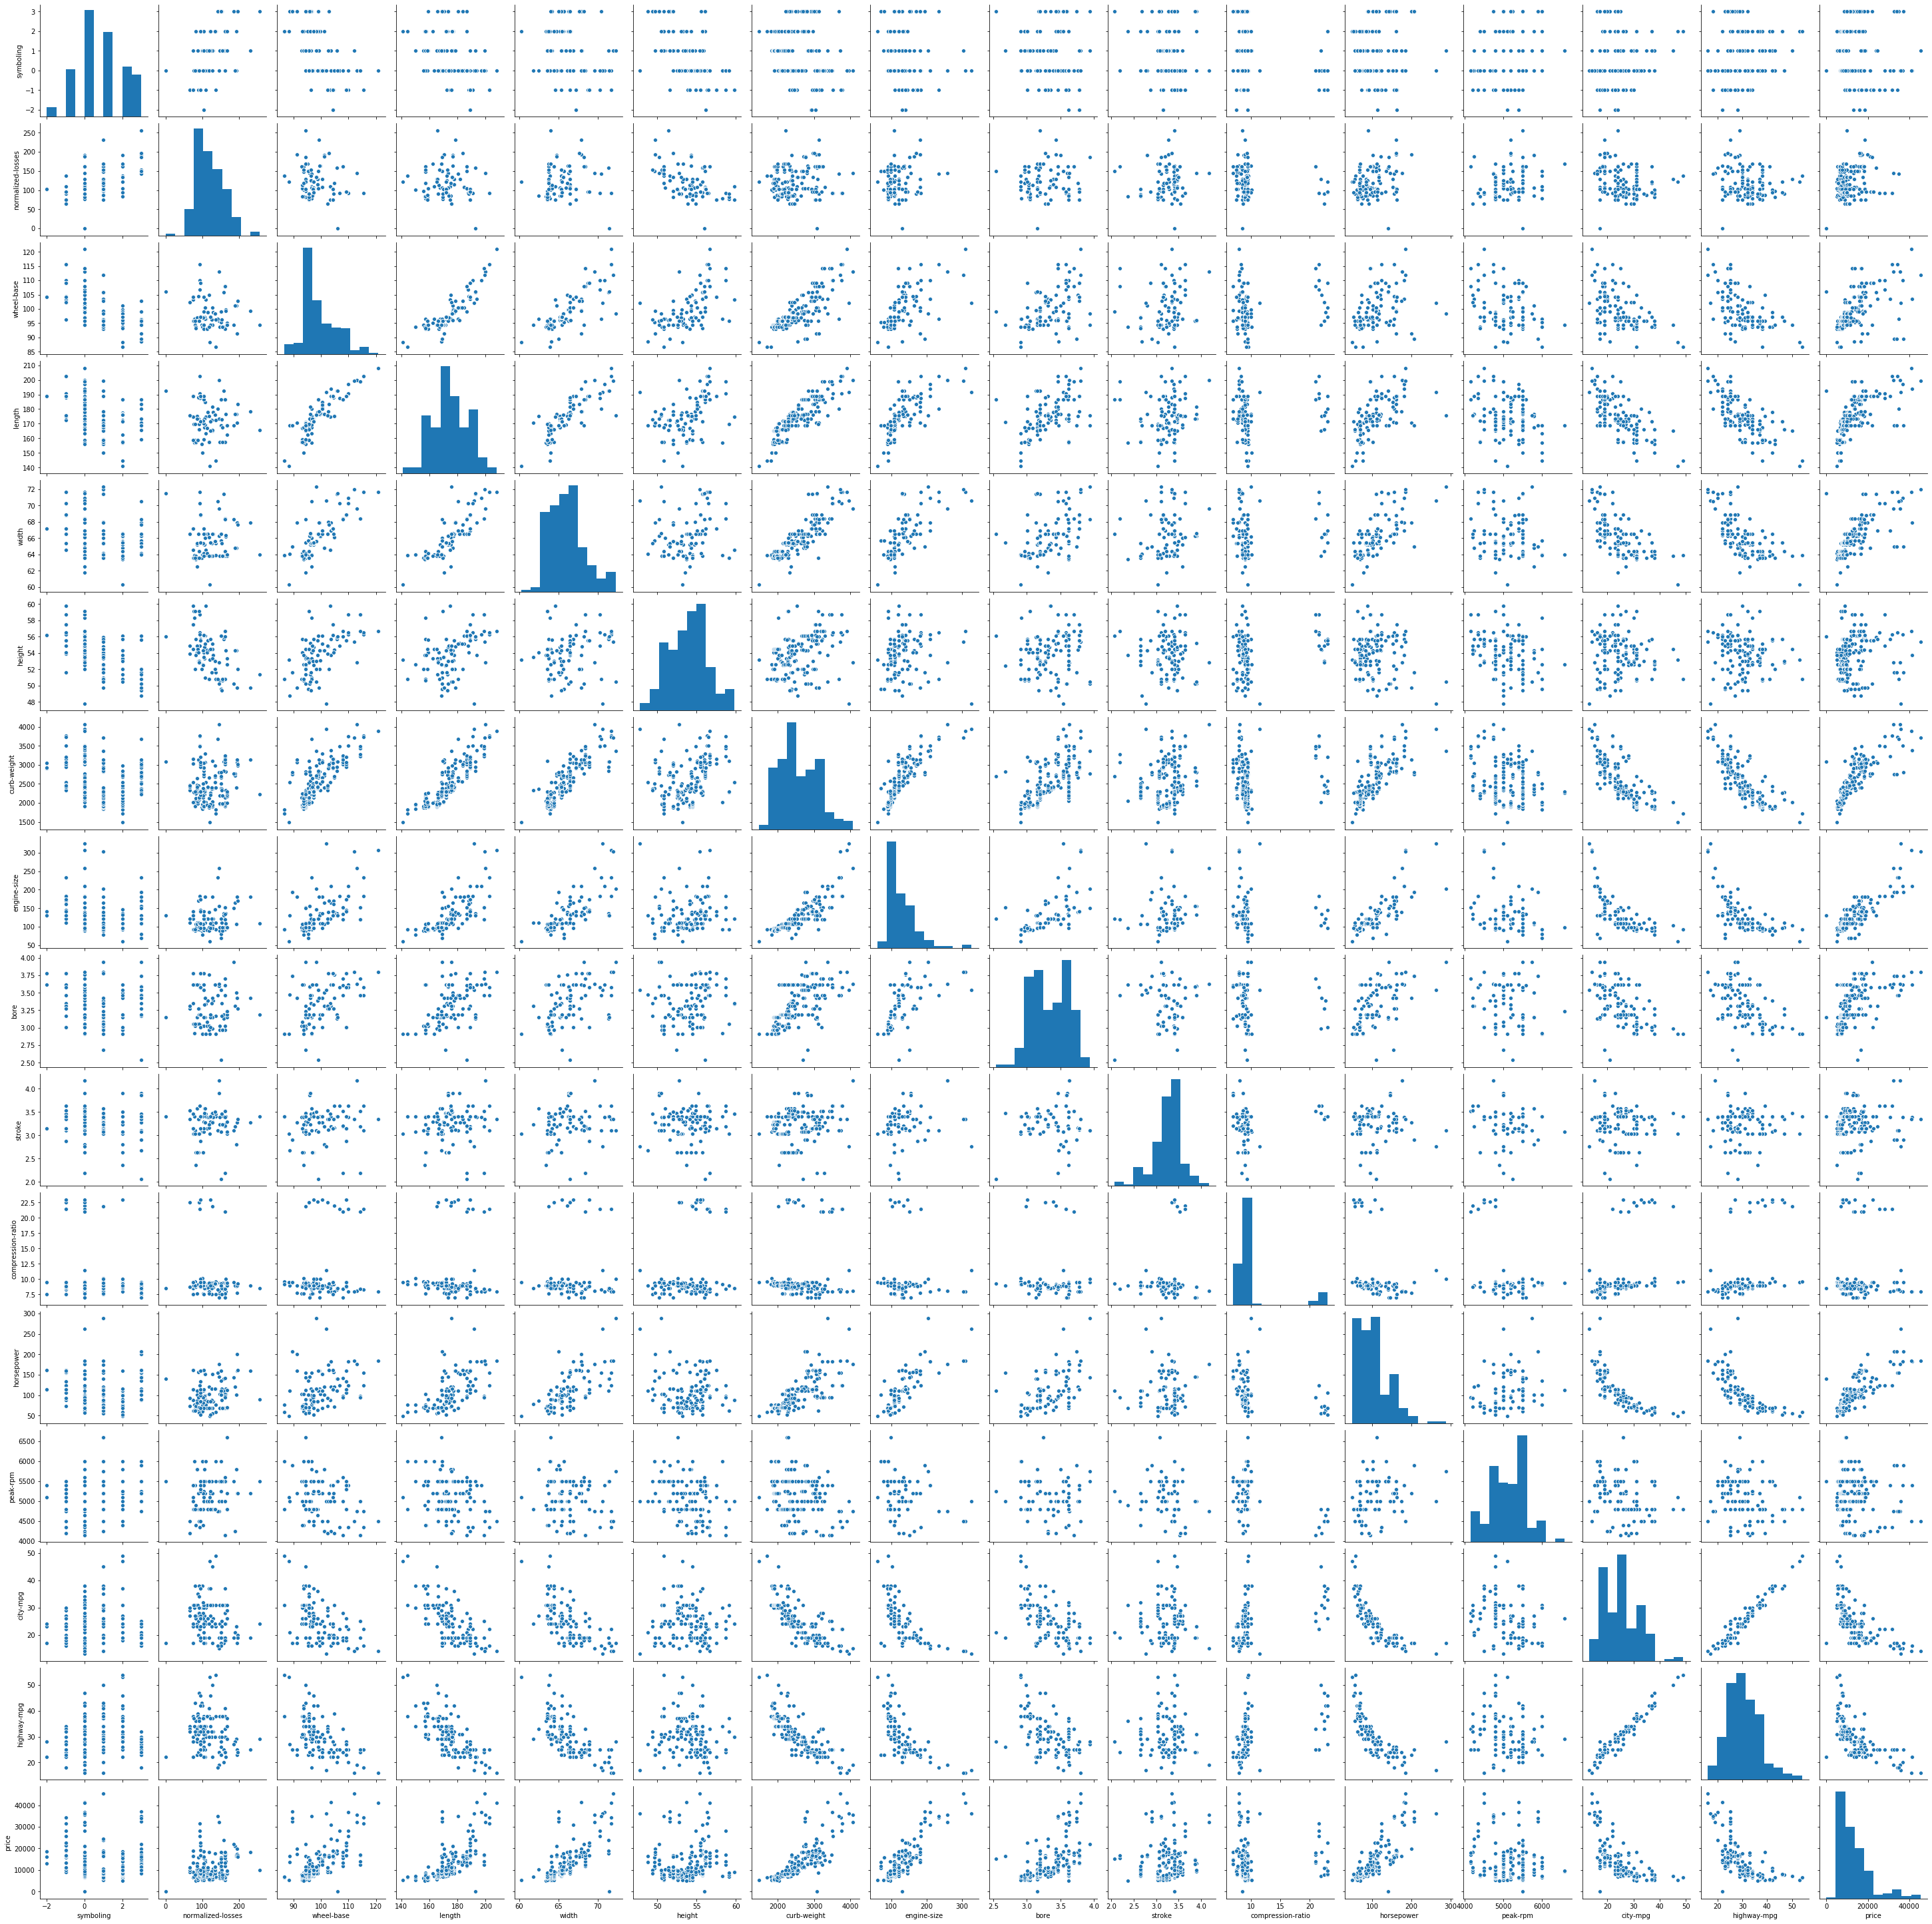

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
df.dtypes

symboling              int64
normalized-losses    float64
make-id               object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [11]:
df['make-id'].value_counts()

toyota           32
volvo            22
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       4
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: make-id, dtype: int64

In [12]:
df['fuel-type'].value_counts()

gas       196
diesel     21
Name: fuel-type, dtype: int64

In [13]:
df['aspiration'].value_counts()

std      174
turbo     43
Name: aspiration, dtype: int64

In [14]:
df['num-of-doors'].value_counts()

four    126
two      89
Name: num-of-doors, dtype: int64

In [15]:
df['body-style'].value_counts()

sedan          105
hatchback       70
wagon           28
hardtop          8
convertible      6
Name: body-style, dtype: int64

In [16]:
df['drive-wheels'].value_counts()

fwd    121
rwd     87
4wd      9
Name: drive-wheels, dtype: int64

In [17]:
df['engine-location'].value_counts()

front    214
rear       3
Name: engine-location, dtype: int64

In [18]:
df['engine-type'].value_counts()

ohc      159
ohcf      15
ohcv      14
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [19]:
df['num-of-cylinders'].value_counts()

four      168
six        26
five       12
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [20]:
df['fuel-system'].value_counts()

mpfi    105
2bbl     66
idi      21
1bbl     11
spdi      9
4bbl      3
spfi      1
mfi       1
Name: fuel-system, dtype: int64

### Preprocessing Data

In [21]:
df

,symboling,normalized-losses,make-id,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
213,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
214,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
215,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [22]:
df2 = df.drop(['symboling','normalized-losses','make-id','engine-location','engine-type','fuel-system',
               'num-of-cylinders'],axis=1)

In [23]:
df2

,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,gas,turbo,four,sedan,rwd,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
213,gas,std,four,sedan,rwd,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
214,diesel,turbo,four,sedan,rwd,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
215,gas,turbo,four,sedan,rwd,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


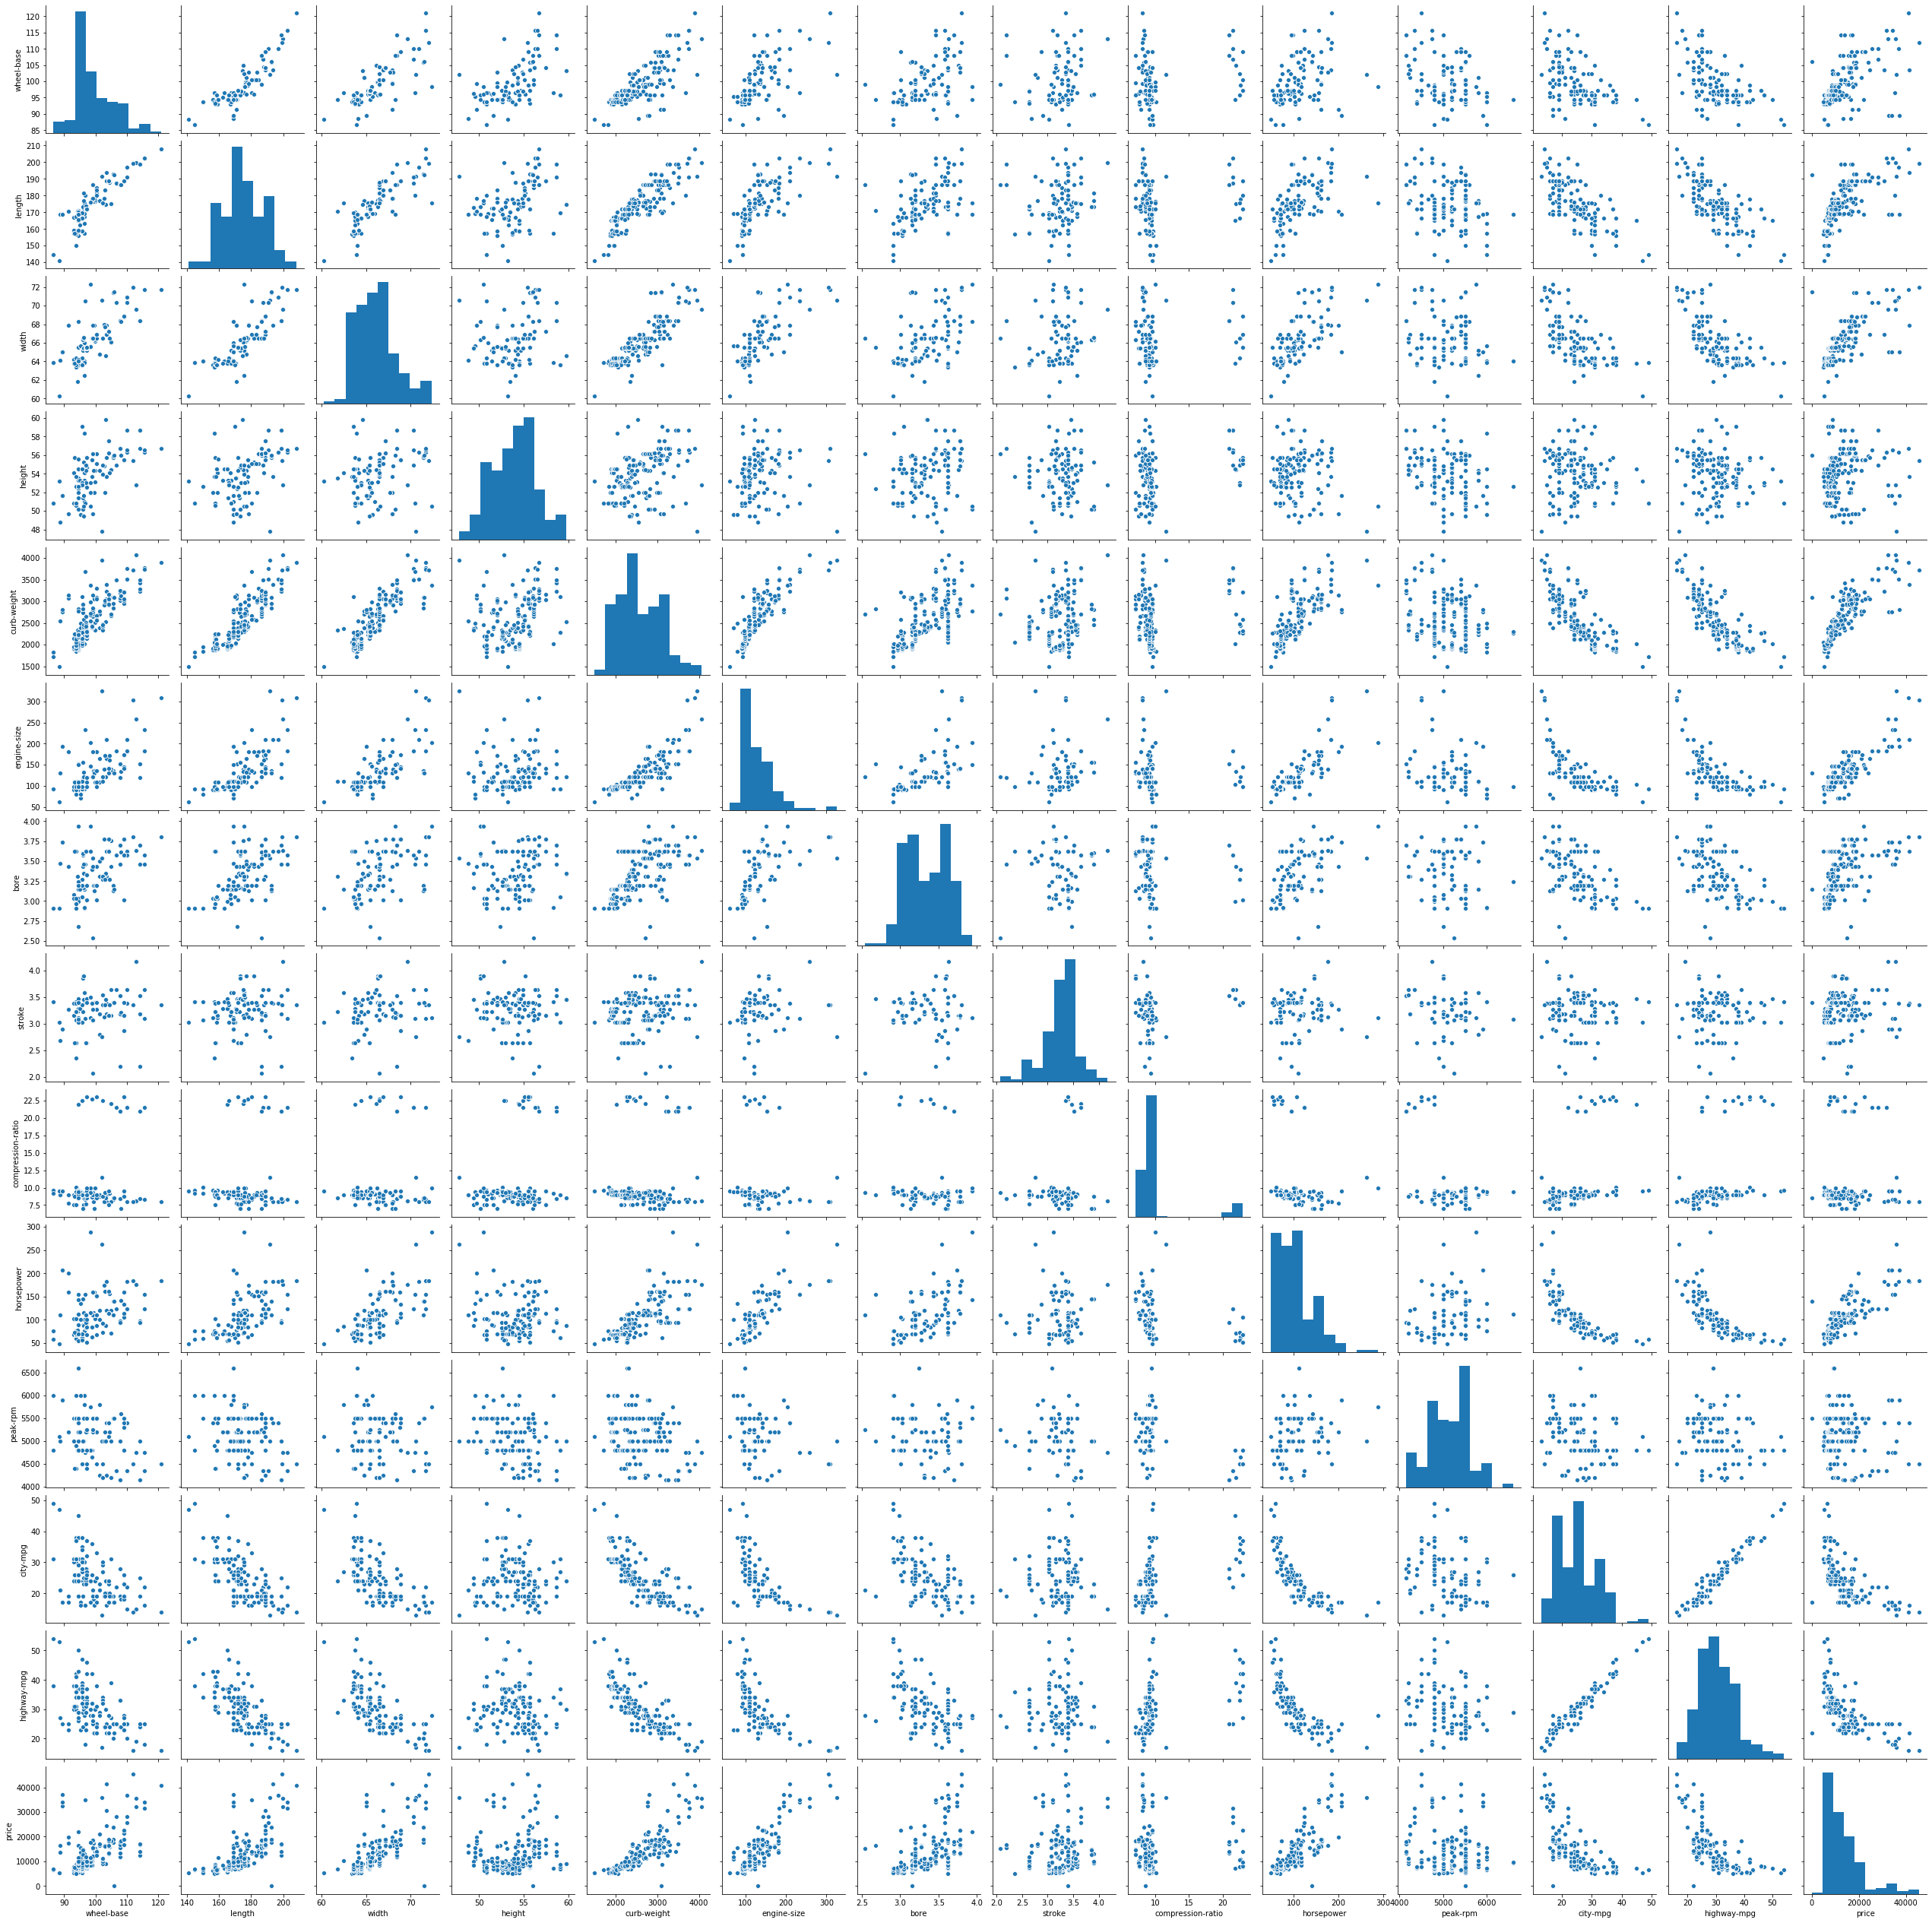

In [24]:
sns.pairplot(df2)
plt.show()

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fuel-type          217 non-null    object 
 1   aspiration         217 non-null    object 
 2   num-of-doors       215 non-null    object 
 3   body-style         217 non-null    object 
 4   drive-wheels       217 non-null    object 
 5   wheel-base         217 non-null    float64
 6   length             217 non-null    float64
 7   width              217 non-null    float64
 8   height             217 non-null    float64
 9   curb-weight        217 non-null    int64  
 10  engine-size        217 non-null    int64  
 11  bore               213 non-null    float64
 12  stroke             213 non-null    float64
 13  compression-ratio  217 non-null    float64
 14  horsepower         215 non-null    float64
 15  peak-rpm           215 non-null    float64
 16  city-mpg           217 non

In [26]:
df2_num = df2[['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke',
               'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']]

In [27]:
df2_num

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25
213,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23
214,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27
215,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,19,25


In [28]:
scaler = StandardScaler()

In [29]:
df2_num = scaler.fit_transform(df2_num)

In [30]:
df2_num

array([[-1.72876093, -0.48852792, -0.8935327 , ..., -0.28918188,
        -0.61518252, -0.5081905 ],
       [-1.72876093, -0.48852792, -0.8935327 , ..., -0.28918188,
        -0.61518252, -0.5081905 ],
       [-0.76484985, -0.29575224, -0.24797923, ..., -0.28918188,
        -0.92455588, -0.65503117],
       ...,
       [ 1.62042163,  1.11793606,  1.31979348, ..., -0.71576236,
         0.15825089, -0.5081905 ],
       [ 1.62042163,  1.11793606,  1.31979348, ...,  0.56397908,
        -0.92455588, -0.80187183],
       [ 1.11395988,  1.41513189,  2.51867849, ...,  0.77726932,
        -1.23392925, -1.24239383]])

In [31]:
df2_num = pd.DataFrame(df2_num,columns=['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke',
               'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg'])

In [32]:
df2_num

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,-1.728761,-0.488528,-0.893533,-2.071616,-0.066607,0.056655,0.442578,-1.845887,-0.287525,0.136739,-0.289182,-0.615183,-0.508191
1,-1.728761,-0.488528,-0.893533,-2.071616,-0.066607,0.056655,0.442578,-1.845887,-0.287525,0.136739,-0.289182,-0.615183,-0.508191
2,-0.764850,-0.295752,-0.247979,-0.598517,0.464994,0.598679,-2.379420,0.710132,-0.287525,1.233140,-0.289182,-0.924556,-0.655031
3,0.101036,0.137993,0.074798,0.178952,-0.474490,-0.460732,-0.557624,0.483649,-0.035147,-0.092740,0.777269,-0.151122,-0.067669
4,0.035686,0.137993,0.167019,0.178952,0.466927,0.204479,-0.557624,0.483649,-0.539904,0.238730,0.777269,-1.079243,-1.242394
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1.620422,1.117936,1.273683,0.669985,0.901874,0.327667,1.549944,-0.325218,-0.363239,1.386126,0.350689,-0.924556,-0.801872
213,1.620422,1.117936,1.319793,0.669985,0.830349,1.116065,0.835514,-1.231148,-0.338001,0.723186,0.777269,-1.079243,-1.095553
214,1.620422,1.117936,1.319793,0.669985,1.226634,0.426217,-1.200611,0.483649,3.245774,0.009250,-0.715762,0.158251,-0.508191
215,1.620422,1.117936,1.319793,0.669985,0.927004,0.327667,1.549944,-0.325218,-0.161336,0.213232,0.563979,-0.924556,-0.801872


In [33]:
df2_cat = df2[['fuel-type','aspiration', 'num-of-doors','body-style','drive-wheels' ]]

In [34]:
df2_cat

,fuel-type,aspiration,num-of-doors,body-style,drive-wheels
0,gas,std,two,convertible,rwd
1,gas,std,two,convertible,rwd
2,gas,std,two,hatchback,rwd
3,gas,std,four,sedan,fwd
4,gas,std,four,sedan,4wd
...,...,...,...,...,...
212,gas,turbo,four,sedan,rwd
213,gas,std,four,sedan,rwd
214,diesel,turbo,four,sedan,rwd
215,gas,turbo,four,sedan,rwd


In [35]:
df2_cat = pd.get_dummies(df2_cat, drop_first=True)

In [36]:
df2_cat

,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd
0,1,0,1,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,1
2,1,0,1,0,1,0,0,0,1
3,1,0,0,0,0,1,0,1,0
4,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
212,1,1,0,0,0,1,0,0,1
213,1,0,0,0,0,1,0,0,1
214,0,1,0,0,0,1,0,0,1
215,1,1,0,0,0,1,0,0,1


In [37]:
label = df2['price']

In [38]:
label

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
212    19045.0
213    21485.0
214    22470.0
215    22625.0
216        0.0
Name: price, Length: 217, dtype: float64

In [39]:
df3 = pd.concat([df2_num,df2_cat,label],axis=1)

In [40]:
df3

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,price
0,-1.728761,-0.488528,-0.893533,-2.071616,-0.066607,0.056655,0.442578,-1.845887,-0.287525,0.136739,-0.289182,-0.615183,-0.508191,1,0,1,0,0,0,0,0,1,13495.0
1,-1.728761,-0.488528,-0.893533,-2.071616,-0.066607,0.056655,0.442578,-1.845887,-0.287525,0.136739,-0.289182,-0.615183,-0.508191,1,0,1,0,0,0,0,0,1,16500.0
2,-0.764850,-0.295752,-0.247979,-0.598517,0.464994,0.598679,-2.379420,0.710132,-0.287525,1.233140,-0.289182,-0.924556,-0.655031,1,0,1,0,1,0,0,0,1,16500.0
3,0.101036,0.137993,0.074798,0.178952,-0.474490,-0.460732,-0.557624,0.483649,-0.035147,-0.092740,0.777269,-0.151122,-0.067669,1,0,0,0,0,1,0,1,0,13950.0
4,0.035686,0.137993,0.167019,0.178952,0.466927,0.204479,-0.557624,0.483649,-0.539904,0.238730,0.777269,-1.079243,-1.242394,1,0,0,0,0,1,0,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1.620422,1.117936,1.273683,0.669985,0.901874,0.327667,1.549944,-0.325218,-0.363239,1.386126,0.350689,-0.924556,-0.801872,1,1,0,0,0,1,0,0,1,19045.0
213,1.620422,1.117936,1.319793,0.669985,0.830349,1.116065,0.835514,-1.231148,-0.338001,0.723186,0.777269,-1.079243,-1.095553,1,0,0,0,0,1,0,0,1,21485.0
214,1.620422,1.117936,1.319793,0.669985,1.226634,0.426217,-1.200611,0.483649,3.245774,0.009250,-0.715762,0.158251,-0.508191,0,1,0,0,0,1,0,0,1,22470.0
215,1.620422,1.117936,1.319793,0.669985,0.927004,0.327667,1.549944,-0.325218,-0.161336,0.213232,0.563979,-0.924556,-0.801872,1,1,0,0,0,1,0,0,1,22625.0


In [41]:
df3.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,price
count,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.130000e+02,2.130000e+02,2.170000e+02,2.150000e+02,2.150000e+02,2.170000e+02,2.170000e+02,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,213.000000
mean,-6.129250e-16,-2.085377e-15,2.161098e-15,-2.624629e-16,3.074857e-16,2.040738e-16,2.376815e-16,1.257992e-15,-9.899915e-17,-8.365401e-17,6.108809e-16,-9.004574e-17,-1.432546e-16,0.903226,0.198157,0.410138,0.036866,0.322581,0.483871,0.129032,0.557604,0.400922,13395.906103
std,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002356e+00,1.002356e+00,1.002312e+00,1.002334e+00,1.002334e+00,1.002312e+00,1.002312e+00,0.296334,0.399532,0.492996,0.188869,0.468545,0.500895,0.336011,0.497819,0.491218,7880.975753
min,-2.055510e+00,-2.713481e+00,-2.645749e+00,-2.480810e+00,-2.115689e+00,-1.643329e+00,-2.879521e+00,-3.819522e+00,-7.922824e-01,-1.469616e+00,-2.102149e+00,-1.852676e+00,-2.123438e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.648499e-01,-6.090127e-01,-8.474217e-01,-7.621949e-01,-7.567225e-01,-7.317436e-01,-7.005101e-01,-4.546363e-01,-3.884768e-01,-9.086669e-01,-7.157624e-01,-9.245559e-01,-8.018718e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7799.000000
50%,-3.237380e-01,-1.110089e-01,-2.018683e-01,9.711290e-02,-2.367196e-01,-1.897197e-01,-5.752334e-02,6.303845e-02,-2.875254e-01,-2.202290e-01,1.373986e-01,-1.511225e-01,-6.766851e-02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10898.000000
75%,6.728480e-01,9.412250e-01,5.359071e-01,7.518236e-01,8.303494e-01,3.276667e-01,9.783998e-01,4.836492e-01,-1.865740e-01,3.789670e-01,7.772693e-01,7.769976e-01,5.196942e-01,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,16630.000000
max,3.548244e+00,2.668174e+00,2.887566e+00,2.429520e+00,2.867833e+00,4.885595e+00,2.121487e+00,2.974959e+00,3.245774e+00,4.649832e+00,3.123462e+00,3.716045e+00,3.456507e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


In [42]:
df3.isnull().sum()

wheel-base              0
length                  0
width                   0
height                  0
curb-weight             0
engine-size             0
bore                    4
stroke                  4
compression-ratio       0
horsepower              2
peak-rpm                2
city-mpg                0
highway-mpg             0
fuel-type_gas           0
aspiration_turbo        0
num-of-doors_two        0
body-style_hardtop      0
body-style_hatchback    0
body-style_sedan        0
body-style_wagon        0
drive-wheels_fwd        0
drive-wheels_rwd        0
price                   4
dtype: int64

In [43]:
traindf = df3[0:216]

In [44]:
traindf

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,price
0,-1.728761,-0.488528,-0.893533,-2.071616,-0.066607,0.056655,0.442578,-1.845887,-0.287525,0.136739,-0.289182,-0.615183,-0.508191,1,0,1,0,0,0,0,0,1,13495.0
1,-1.728761,-0.488528,-0.893533,-2.071616,-0.066607,0.056655,0.442578,-1.845887,-0.287525,0.136739,-0.289182,-0.615183,-0.508191,1,0,1,0,0,0,0,0,1,16500.0
2,-0.764850,-0.295752,-0.247979,-0.598517,0.464994,0.598679,-2.379420,0.710132,-0.287525,1.233140,-0.289182,-0.924556,-0.655031,1,0,1,0,1,0,0,0,1,16500.0
3,0.101036,0.137993,0.074798,0.178952,-0.474490,-0.460732,-0.557624,0.483649,-0.035147,-0.092740,0.777269,-0.151122,-0.067669,1,0,0,0,0,1,0,1,0,13950.0
4,0.035686,0.137993,0.167019,0.178952,0.466927,0.204479,-0.557624,0.483649,-0.539904,0.238730,0.777269,-1.079243,-1.242394,1,0,0,0,0,1,0,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1.620422,1.117936,1.319793,0.669985,0.714364,0.327667,1.549944,-0.325218,-0.161336,0.213232,0.563979,-0.305809,-0.361350,1,0,0,0,0,1,0,0,1,16845.0
212,1.620422,1.117936,1.273683,0.669985,0.901874,0.327667,1.549944,-0.325218,-0.363239,1.386126,0.350689,-0.924556,-0.801872,1,1,0,0,0,1,0,0,1,19045.0
213,1.620422,1.117936,1.319793,0.669985,0.830349,1.116065,0.835514,-1.231148,-0.338001,0.723186,0.777269,-1.079243,-1.095553,1,0,0,0,0,1,0,0,1,21485.0
214,1.620422,1.117936,1.319793,0.669985,1.226634,0.426217,-1.200611,0.483649,3.245774,0.009250,-0.715762,0.158251,-0.508191,0,1,0,0,0,1,0,0,1,22470.0


In [45]:
traindf.isnull().sum()

wheel-base              0
length                  0
width                   0
height                  0
curb-weight             0
engine-size             0
bore                    4
stroke                  4
compression-ratio       0
horsepower              2
peak-rpm                2
city-mpg                0
highway-mpg             0
fuel-type_gas           0
aspiration_turbo        0
num-of-doors_two        0
body-style_hardtop      0
body-style_hatchback    0
body-style_sedan        0
body-style_wagon        0
drive-wheels_fwd        0
drive-wheels_rwd        0
price                   4
dtype: int64

In [46]:
traindf.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
traindf

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,price
0,-1.728761,-0.488528,-0.893533,-2.071616,-0.066607,0.056655,0.442578,-1.845887,-0.287525,0.136739,-0.289182,-0.615183,-0.508191,1,0,1,0,0,0,0,0,1,13495.0
1,-1.728761,-0.488528,-0.893533,-2.071616,-0.066607,0.056655,0.442578,-1.845887,-0.287525,0.136739,-0.289182,-0.615183,-0.508191,1,0,1,0,0,0,0,0,1,16500.0
2,-0.764850,-0.295752,-0.247979,-0.598517,0.464994,0.598679,-2.379420,0.710132,-0.287525,1.233140,-0.289182,-0.924556,-0.655031,1,0,1,0,1,0,0,0,1,16500.0
3,0.101036,0.137993,0.074798,0.178952,-0.474490,-0.460732,-0.557624,0.483649,-0.035147,-0.092740,0.777269,-0.151122,-0.067669,1,0,0,0,0,1,0,1,0,13950.0
4,0.035686,0.137993,0.167019,0.178952,0.466927,0.204479,-0.557624,0.483649,-0.539904,0.238730,0.777269,-1.079243,-1.242394,1,0,0,0,0,1,0,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1.620422,1.117936,1.319793,0.669985,0.714364,0.327667,1.549944,-0.325218,-0.161336,0.213232,0.563979,-0.305809,-0.361350,1,0,0,0,0,1,0,0,1,16845.0
212,1.620422,1.117936,1.273683,0.669985,0.901874,0.327667,1.549944,-0.325218,-0.363239,1.386126,0.350689,-0.924556,-0.801872,1,1,0,0,0,1,0,0,1,19045.0
213,1.620422,1.117936,1.319793,0.669985,0.830349,1.116065,0.835514,-1.231148,-0.338001,0.723186,0.777269,-1.079243,-1.095553,1,0,0,0,0,1,0,0,1,21485.0
214,1.620422,1.117936,1.319793,0.669985,1.226634,0.426217,-1.200611,0.483649,3.245774,0.009250,-0.715762,0.158251,-0.508191,0,1,0,0,0,1,0,0,1,22470.0


In [48]:
traindf.isnull().sum()

wheel-base              0
length                  0
width                   0
height                  0
curb-weight             0
engine-size             0
bore                    0
stroke                  0
compression-ratio       0
horsepower              0
peak-rpm                0
city-mpg                0
highway-mpg             0
fuel-type_gas           0
aspiration_turbo        0
num-of-doors_two        0
body-style_hardtop      0
body-style_hatchback    0
body-style_sedan        0
body-style_wagon        0
drive-wheels_fwd        0
drive-wheels_rwd        0
price                   0
dtype: int64

In [49]:
#Save to csv
#traindf.to_csv("autospp.csv",index=False)

In [50]:
#Create test dataset
testdf = df3[216:]

In [51]:
testdf

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,price
216,1.11396,1.415132,2.518678,0.874582,0.971465,0.056655,-0.70051,0.483649,-0.413715,0.876172,0.777269,-1.233929,-1.242394,1,1,0,0,0,1,0,1,0,0.0


In [52]:
testdf = testdf.drop(columns=['price'],axis=1)

In [53]:
testdf

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd
216,1.11396,1.415132,2.518678,0.874582,0.971465,0.056655,-0.70051,0.483649,-0.413715,0.876172,0.777269,-1.233929,-1.242394,1,1,0,0,0,1,0,1,0


In [54]:
#Save to csv
#testdf.to_csv("autostest.csv",index=False)

### Model Training

In [55]:
traindf

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,price
0,-1.728761,-0.488528,-0.893533,-2.071616,-0.066607,0.056655,0.442578,-1.845887,-0.287525,0.136739,-0.289182,-0.615183,-0.508191,1,0,1,0,0,0,0,0,1,13495.0
1,-1.728761,-0.488528,-0.893533,-2.071616,-0.066607,0.056655,0.442578,-1.845887,-0.287525,0.136739,-0.289182,-0.615183,-0.508191,1,0,1,0,0,0,0,0,1,16500.0
2,-0.764850,-0.295752,-0.247979,-0.598517,0.464994,0.598679,-2.379420,0.710132,-0.287525,1.233140,-0.289182,-0.924556,-0.655031,1,0,1,0,1,0,0,0,1,16500.0
3,0.101036,0.137993,0.074798,0.178952,-0.474490,-0.460732,-0.557624,0.483649,-0.035147,-0.092740,0.777269,-0.151122,-0.067669,1,0,0,0,0,1,0,1,0,13950.0
4,0.035686,0.137993,0.167019,0.178952,0.466927,0.204479,-0.557624,0.483649,-0.539904,0.238730,0.777269,-1.079243,-1.242394,1,0,0,0,0,1,0,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1.620422,1.117936,1.319793,0.669985,0.714364,0.327667,1.549944,-0.325218,-0.161336,0.213232,0.563979,-0.305809,-0.361350,1,0,0,0,0,1,0,0,1,16845.0
212,1.620422,1.117936,1.273683,0.669985,0.901874,0.327667,1.549944,-0.325218,-0.363239,1.386126,0.350689,-0.924556,-0.801872,1,1,0,0,0,1,0,0,1,19045.0
213,1.620422,1.117936,1.319793,0.669985,0.830349,1.116065,0.835514,-1.231148,-0.338001,0.723186,0.777269,-1.079243,-1.095553,1,0,0,0,0,1,0,0,1,21485.0
214,1.620422,1.117936,1.319793,0.669985,1.226634,0.426217,-1.200611,0.483649,3.245774,0.009250,-0.715762,0.158251,-0.508191,0,1,0,0,0,1,0,0,1,22470.0


In [56]:
traindf.shape

(206, 23)

In [57]:
X = traindf.iloc[:,0:22]
y = traindf.iloc[:,22]

In [58]:
X.values, y.values

(array([[-1.72876093, -0.48852792, -0.8935327 , ...,  0.        ,
          0.        ,  1.        ],
        [-1.72876093, -0.48852792, -0.8935327 , ...,  0.        ,
          0.        ,  1.        ],
        [-0.76484985, -0.29575224, -0.24797923, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 1.62042163,  1.11793606,  1.31979348, ...,  0.        ,
          0.        ,  1.        ],
        [ 1.62042163,  1.11793606,  1.31979348, ...,  0.        ,
          0.        ,  1.        ],
        [ 1.62042163,  1.11793606,  1.31979348, ...,  0.        ,
          0.        ,  1.        ]]),
 array([13495., 16500., 16500., 13950., 17450., 15250., 17710., 18920.,
        23875., 16430., 16925., 20970., 21105., 24565., 30760., 41315.,
        36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,
         6692.,  7609.,  8558.,  8921., 12964.,  6479.,  6855.,  5399.,
         6529.,  7129.,  7295.,  7295.,  7895.,  9095.,  8845., 10295.,
        12945

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [60]:
X_train.shape, X_test.shape

((144, 22), (62, 22))

In [61]:
xgb = XGBRegressor(random_state=123, n_estimators=200, objective='reg:squarederror')

In [62]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=20)

[0]	validation_0-rmse:12360.8
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:11134.7
[2]	validation_0-rmse:10032.6
[3]	validation_0-rmse:9049.65
[4]	validation_0-rmse:8164.2
[5]	validation_0-rmse:7364
[6]	validation_0-rmse:6651.53
[7]	validation_0-rmse:6055.42
[8]	validation_0-rmse:5464.96
[9]	validation_0-rmse:4951.38
[10]	validation_0-rmse:4479.86
[11]	validation_0-rmse:4084.26
[12]	validation_0-rmse:3718.98
[13]	validation_0-rmse:3387.14
[14]	validation_0-rmse:3131.15
[15]	validation_0-rmse:2940.7
[16]	validation_0-rmse:2755.05
[17]	validation_0-rmse:2599.27
[18]	validation_0-rmse:2424.51
[19]	validation_0-rmse:2294.99
[20]	validation_0-rmse:2195.72
[21]	validation_0-rmse:2086.87
[22]	validation_0-rmse:2023.02
[23]	validation_0-rmse:1965.99
[24]	validation_0-rmse:1913.36
[25]	validation_0-rmse:1874.7
[26]	validation_0-rmse:1849.25
[27]	validation_0-rmse:1825.15
[28]	validation_0-rmse:1808.24
[29]	validation_0-rmse:1777.51
[30]	validation_0-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [63]:
y_pred = xgb.predict(X_test)

In [64]:
y_pred

array([ 8663.905 , 11482.327 , 13351.094 , 11817.431 , 14730.191 ,
        7985.527 ,  6339.9165, 15867.794 , 17398.373 ,  6287.9976,
       14941.587 ,  6800.0444, 10628.785 , 28455.588 , 11406.229 ,
        8281.7   , 10796.507 , 19432.229 ,  7196.521 ,  5871.824 ,
       17010.785 , 16251.554 , 10796.507 ,  6020.344 ,  8878.666 ,
       17616.688 , 14373.817 ,  7058.9727, 21451.953 ,  6476.559 ,
        9851.449 ,  7282.1787,  9440.912 ,  9907.478 , 15357.505 ,
        8746.107 , 14287.796 ,  9167.343 , 17175.666 , 21628.32  ,
        7138.482 , 33795.285 , 15801.316 , 10575.235 ,  8996.113 ,
       15801.316 , 12500.289 ,  8805.855 ,  8258.218 ,  8746.107 ,
        7192.785 , 15801.316 ,  7449.696 ,  7044.574 , 18074.486 ,
       21138.035 ,  6709.1294,  6412.66  ,  7988.4487, 33841.164 ,
        8151.671 , 16387.115 ], dtype=float32)

In [65]:
mse = mean_squared_error(y_test,y_pred)
mse

1956264.4011107222

In [66]:
rmse = np.sqrt(mse)
rmse

1398.6652212415672

In [67]:
r2score = r2_score(y_test,y_pred)
r2score

0.9509834504906577

Text(0.5, 0, 'Actual')

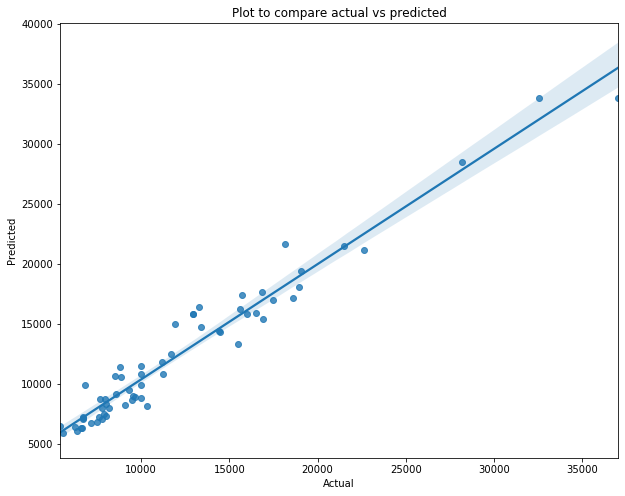

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")

### Prediction

In [69]:
testdf

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd
216,1.11396,1.415132,2.518678,0.874582,0.971465,0.056655,-0.70051,0.483649,-0.413715,0.876172,0.777269,-1.233929,-1.242394,1,1,0,0,0,1,0,1,0


In [70]:
answer = xgb.predict(testdf)

In [71]:
answer

array([23137.207], dtype=float32)

The price is for gas type. 

In [72]:
#Load second test set for married/unmarried case
df5 = pd.read_csv("autotest2.csv")

In [73]:
df5

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd
0,1.11396,1.415132,2.518678,0.874582,0.971465,0.056655,-0.70051,0.483649,-0.413715,0.876172,0.777269,-1.233929,-1.242394,0,1,0,0,0,1,0,1,0


In [74]:
answer2 = xgb.predict(df5)

In [75]:
answer2

array([23137.207], dtype=float32)

The price is for diesel type. 